# E5 Advanced geospatial plotting 

In [1]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#import data

df = pd.read_csv('NY_data_sample.csv', index_col = 0)

C:\Users\Barb\AppData\Local\Temp\ipykernel_10004\1702794093.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NY_data_sample.csv', index_col = 0)


In [3]:
#Remove unnecessary columns
#Only need ['start_station_name'], ['end_station_name'], and ['value']

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df_drop_col = df.drop(columns = ['_merge', 'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_id', 'end_station_id', 'member_casual', 'date', 'avgTemp'])

In [6]:
df_drop_col.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng
25092672,Beaver St & Fayette St,Beaver St & Fayette St,40.700993,-73.939164,40.700990,-73.939210
850261,E 53 St & Madison Ave,E 84 St & 1 Ave,40.759711,-73.974023,40.775655,-73.950686
25461273,Lafayette St & E 8 St,W 15 St & 7 Ave,40.730207,-73.991026,40.739355,-73.999318
8836007,1 Ave & E 68 St,27 St & Hunter St,40.765005,-73.958185,40.748500,-73.941275
20383470,Carroll St & Columbia St,Congress St & Hicks St,40.683046,-74.003486,40.689395,-73.999513


In [7]:
df_location=df_drop_col.drop_duplicates(subset=['start_station_name','end_station_name'])

In [8]:
df_location

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng
25092672,Beaver St & Fayette St,Beaver St & Fayette St,40.700993,-73.939164,40.700990,-73.939210
850261,E 53 St & Madison Ave,E 84 St & 1 Ave,40.759711,-73.974023,40.775655,-73.950686
25461273,Lafayette St & E 8 St,W 15 St & 7 Ave,40.730207,-73.991026,40.739355,-73.999318
8836007,1 Ave & E 68 St,27 St & Hunter St,40.765005,-73.958185,40.748500,-73.941275
20383470,Carroll St & Columbia St,Congress St & Hicks St,40.683046,-74.003486,40.689395,-73.999513
...,...,...,...,...,...,...
17419005,Hazen St & 20 Ave,Willis Ave & Bruckner Blvd,40.772092,-73.895166,40.805701,-73.925177
1781890,4 Ave & 3 St,2 Ave & E 96 St,40.673746,-73.985649,40.783964,-73.947167
20770900,Vernon Blvd & 50 Ave,Tompkins Ave & Hopkins St,40.742327,-73.954117,40.699576,-73.947084
12158838,12 Ave & W 125 St,E 81 St & Park Ave,40.818299,-73.960405,40.776777,-73.959010


## Data preprocessing

In [9]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [10]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,148
1,1 Ave & E 110 St,1 Ave & E 18 St,1
2,1 Ave & E 110 St,1 Ave & E 30 St,1
3,1 Ave & E 110 St,1 Ave & E 44 St,1
4,1 Ave & E 110 St,1 Ave & E 62 St,3
...,...,...,...
614073,Yankee Ferry Terminal,W 12 St & Hudson St,1
614074,Yankee Ferry Terminal,W 30 St & 10 Ave,1
614075,Yankee Ferry Terminal,Water St & Fletcher St,3
614076,Yankee Ferry Terminal,West St & Liberty St,1


In [11]:
df_group=df_group.merge(df_location,on=['start_station_name', 'end_station_name'], how= 'inner')

In [12]:
df_group

,start_station_name,end_station_name,value,start_lat,start_lng,end_lat,end_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,148,40.792327,-73.938300,40.792327,-73.938300
1,1 Ave & E 110 St,1 Ave & E 18 St,1,40.792327,-73.938300,40.733812,-73.980544
2,1 Ave & E 110 St,1 Ave & E 30 St,1,40.792393,-73.938230,40.741444,-73.975361
3,1 Ave & E 110 St,1 Ave & E 44 St,1,40.792327,-73.938300,40.750020,-73.969053
4,1 Ave & E 110 St,1 Ave & E 62 St,3,40.792327,-73.938300,40.761227,-73.960940
...,...,...,...,...,...,...,...
614073,Yankee Ferry Terminal,W 12 St & Hudson St,1,40.687066,-74.016756,40.737530,-74.005589
614074,Yankee Ferry Terminal,W 30 St & 10 Ave,1,40.687066,-74.016756,40.752694,-74.002353
614075,Yankee Ferry Terminal,Water St & Fletcher St,3,40.687066,-74.016756,40.706411,-74.005597
614076,Yankee Ferry Terminal,West St & Liberty St,1,40.687066,-74.016756,40.711444,-74.014847


In [13]:
df_group.rename(columns = {'start_station_name':'starting_station','end_station_name' : 'ending_station',
                          'value': 'count_of_trips'}, inplace = True)

In [14]:
print(df_group['count_of_trips'].sum())
df.shape

5953849


(5967761, 17)

In [15]:
df_group['count_of_trips'].describe()

count    614078.000000
mean          9.695591
std          24.898340
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max        2328.000000
Name: count_of_trips, dtype: float64

### Some exploratory analysis into the trips

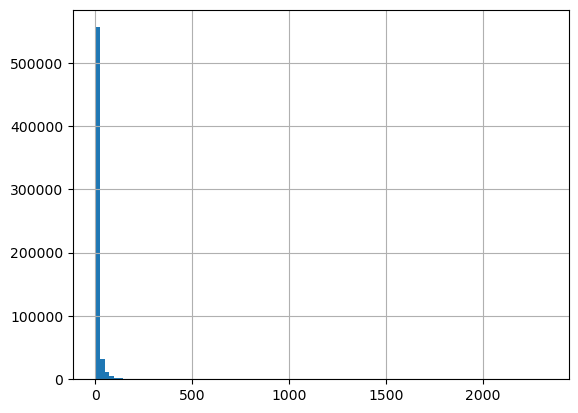

In [16]:
df_group['count_of_trips'].hist(bins = 100)
plt.show()

[]

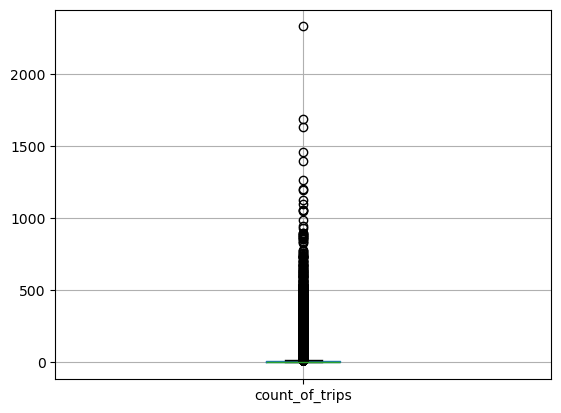

In [17]:
b_plot = df_group.boxplot(column = 'count_of_trips') 
b_plot.plot()

In [18]:
df_group_sort = df_group['count_of_trips'].sort_index().value_counts()

In [19]:
df_group_sort.head()

count_of_trips
1    219248
2     88821
3     51223
4     34563
5     25579
Name: count, dtype: int64

In [20]:
df_group_plot = df_group.nlargest(n=10000, columns='count_of_trips')

In [21]:
df_group_plot.to_csv('df_group_plot.csv')

## PLot the map

In [22]:
# Create KeplerGl instance

#m = KeplerGl(height = 700, data={"data_1": df_group_plot})
#m

In [23]:
#config = m.config

In [24]:
#config

In [25]:
#import json
#with open("config.json", "w") as outfile:
#   json.dump(config, outfile)

In [26]:
#m.save_to_html(file_name = 'CitiBike Bike Trips Aggregated.html', read_only = False, config = config)